# Music chart crawling

## Melon

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup

In [2]:
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

In [5]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

In [7]:
url = 'http://www.melon.com/chart/index.htm'
driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [8]:
song_data = []
rank = 1

songs = soup.select('table > tbody > tr')
for song in songs:
    title = song.select('div.rank01 > span > a')[0].text
    singer = song.select('div.rank02 > a')[0].text
    song_data.append(['Melon', rank, title, singer])
    rank = rank + 1

In [9]:
import pandas as pd
columns = ['Service', 'Rank', 'Title', 'Singer']
melon = pd.DataFrame(song_data, columns = columns)
melon.head()

,Service,Rank,Title,Singer
0,Melon,1,퀸카 (Queencard),(여자)아이들
1,Melon,2,I AM,IVE (아이브)
2,Melon,3,"이브, 프시케 그리고 푸른 수염의 아내",LE SSERAFIM (르세라핌)
3,Melon,4,Spicy,aespa
4,Melon,5,UNFORGIVEN (feat. Nile Rodgers),LE SSERAFIM (르세라핌)


In [17]:
pip install openpyxl

                                              0.0/250.0 kB ? eta -:--:--
     ------------------                     122.9/250.0 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
melon.to_excel('./files/melon.xlsx', index=False)

## Bugs

In [21]:
url = 'https://music.bugs.co.kr/chart'
driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [23]:
songs = soup.select('tr')
print(len(songs))

104


In [24]:
songs = soup.select('tbody > tr')
print(len(songs))

103


In [25]:
songs = soup.select('table.byChart > tbody > tr')
print(len(songs))

100


In [26]:
print(songs[0])

<tr albumid="31755650" artistid="80286124" multiartist="N" mvid="0" rowtype="track" trackid="103259794">
<input name="_isStream" type="hidden" value="103259794"/>
<input name="_isDown" type="hidden" value="103259794"/>
<td class="check"><input buyminquality="T" disc_id="1" name="check" title="Steal The Show (From “엘리멘탈”)" type="checkbox" value="103259794"/></td>
<td>
<div class="ranking">
<strong>1</strong>
<p class="change none"><em>0</em><span>변동없음</span></p>
</div>
</td>
<td>
<a class="thumbnail" href="https://music.bugs.co.kr/album/31755650?wl_ref=list_tr_07_chart" onclick="
">
<span class="mask"></span>
<img alt="Steal The Show (From “엘리멘탈”) 대표이미지" onerror="bugs.utils.imgError(this);" src="https://image.bugsm.co.kr/album/images/50/317556/31755650.jpg?version=20230617011201.0"/>
</a>
</td>
<td>
<a class="trackInfo" href="https://music.bugs.co.kr/track/103259794?wl_ref=list_tr_08_chart" onclick="
">곡정보</a>
</td>
<th scope="row">
<p adult_yn="N" class="title">
<a adultcheckval="1" ar

In [29]:
song = songs[0]
print(song)

<tr albumid="31755650" artistid="80286124" multiartist="N" mvid="0" rowtype="track" trackid="103259794">
<input name="_isStream" type="hidden" value="103259794"/>
<input name="_isDown" type="hidden" value="103259794"/>
<td class="check"><input buyminquality="T" disc_id="1" name="check" title="Steal The Show (From “엘리멘탈”)" type="checkbox" value="103259794"/></td>
<td>
<div class="ranking">
<strong>1</strong>
<p class="change none"><em>0</em><span>변동없음</span></p>
</div>
</td>
<td>
<a class="thumbnail" href="https://music.bugs.co.kr/album/31755650?wl_ref=list_tr_07_chart" onclick="
">
<span class="mask"></span>
<img alt="Steal The Show (From “엘리멘탈”) 대표이미지" onerror="bugs.utils.imgError(this);" src="https://image.bugsm.co.kr/album/images/50/317556/31755650.jpg?version=20230617011201.0"/>
</a>
</td>
<td>
<a class="trackInfo" href="https://music.bugs.co.kr/track/103259794?wl_ref=list_tr_08_chart" onclick="
">곡정보</a>
</td>
<th scope="row">
<p adult_yn="N" class="title">
<a adultcheckval="1" ar

In [30]:
title = song.select('a')
len(title)

10

In [31]:
title = song.select('p > a')
len(title)

2

In [33]:
title = song.select('p.title > a')
len(title)

1

In [34]:
title = song.select('p.title > a')[0].text
title

'Steal The Show (From “엘리멘탈”)'

In [36]:
singer = song.select('p.artist > a')[0].text
singer

'Lauv(라우브)'

In [37]:
songs = soup.select('table.byChart > tbody > tr')

for song in songs:
    title = song.select('p.title > a')[0].text
    singer = song.select('p.artist > a')[0].text
    print(title, singer, sep = '|')

Steal The Show (From “엘리멘탈”)|Lauv(라우브)
퀸카 (Queencard)|(여자)아이들
I AM|IVE (아이브)
이브, 프시케 그리고 푸른 수염의 아내|LE SSERAFIM (르세라핌)
Spicy|aespa
Kitsch|IVE (아이브)
헤어지자 말해요|박재정
UNFORGIVEN (feat. Nile Rodgers)|LE SSERAFIM (르세라핌)
Hype Boy|NewJeans
HARD|SHINee (샤이니)
Ditto|NewJeans
Cupid|FIFTY FIFTY
손오공|세븐틴(SEVENTEEN)
Attention|NewJeans
Thirsty|aespa
After LIKE|IVE (아이브)
OMG|NewJeans
KNOCK|이채연
건물 사이에 피어난 장미 (Rose Blossom)|H1-KEY (하이키)
LOVE DIVE|IVE (아이브)
Dangerously|Charlie Puth(찰리 푸스)
너에게 닿을게|정승환
꽃|지수(JISOO)
I Don’t Think That I Like Her|Charlie Puth(찰리 푸스)
Teddy Bear|STAYC(스테이씨)
사건의 지평선|윤하(Younha/ユンナ)
파이팅 해야지 (Feat. 이영지)|부석순(SEVENTEEN)
Allergy|(여자)아이들
When I Get Old|Christopher(크리스토퍼)
ANTIFRAGILE|LE SSERAFIM (르세라핌)
한 페이지가 될 수 있게|DAY6 (데이식스)
That’s Not How This Works (feat. Dan + Shay)|Charlie Puth(찰리 푸스)
심(心)|DK(디셈버)
잠깐 시간 될까|이무진
SOS|강다니엘(KANG DANIEL)
사랑인가 봐|멜로망스(MeloMance)
특|Stray Kids (스트레이 키즈)
빛이 나는 너에게|던 (DAWN)
주저하는 연인들을 위해|잔나비
오르트구름|윤하(Younha/ユンナ)
너의 모든 순간|성시경
STAY|The Kid LAROI
사실말야내가말야그게그러니까말이야|케이

In [40]:
song_data = []
rank = 1
songs = soup.select('table.byChart > tbody > tr')

for song in songs:
    title =  song.select('p.title > a')[0].text
    singer = song.select('p.artist > a')[0].text
    song_data.append(['Bugs', rank, title, singer])
    rank = rank + 1

In [41]:
columns = ['Service', 'Rank', 'Title', 'Singer']
Bugs = pd.DataFrame(song_data, columns=columns)
Bugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Service  100 non-null    object
 1   Rank     100 non-null    int64 
 2   Title    100 non-null    object
 3   Singer   100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


In [42]:
Bugs.to_excel('./files/bugs.xlsx', index=False)

## Genie

In [44]:
url = 'https://www.genie.co.kr/chart/top200'
driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [45]:
songs = soup.select('table > tbody > tr')
len(songs)

50

In [46]:
print(songs[0])

<tr class="list" songid="101686193">
<td class="check"><input class="select-check" title="퀸카 (Queencard)" type="checkbox"/></td>
<td class="number">1
                                        
                                    <span class="rank">
<span class="rank"><span class="rank-none"><span class="hide">유지</span></span></span>
</span>
</td>
<td><a class="cover" href="#" onclick="fnViewAlbumLayer('83810194');return false;"><span class="mask"></span><img alt="I feel" onerror="this.src='//image.genie.co.kr/imageg/web/common/blank_68.gif';" src="//image.genie.co.kr/Y/IMAGE/IMG_ALBUM/083/810/194/83810194_1684117368811_1_140x140.JPG/dims/resize/Q_80,0"/></a></td>
<td class="link"><a class="btn-basic btn-info" href="#" onclick="fnViewSongInfo('101686193');return false;">곡 제목 정보 페이지</a></td>
<td class="info">
<a class="title ellipsis" href="#" onclick="fnPlaySong('101686193','1');return false;" title="재생">
                                        
                                           

In [47]:
song = songs[0]

In [48]:
title = song.select('a.title')
len(title)

1

In [49]:
title = title[0].text
title

'\n                                        \n                                            \n                                        \n                                        \n                                        \n                                        \n                                            \n                                                퀸카 (Queencard)'

In [50]:
title = title.strip()
title

'퀸카 (Queencard)'

In [52]:
singer = song.select('a.artist')
len(singer)

1

In [53]:
singer = song.select('a.artist')[0].text
singer

'(여자)아이들'

In [55]:
songs = soup.select('tbody > tr')

for song in songs:
    title = song.select('a.title')[0].text.strip()
    singer = song.select('a.artist')[0].text
    print(title, singer, sep='|')

퀸카 (Queencard)|(여자)아이들
I AM|IVE (아이브)
이브, 프시케 그리고 푸른 수염의 아내|LE SSERAFIM (르세라핌)
Spicy|aespa
Kitsch|IVE (아이브)
헤어지자 말해요|박재정
UNFORGIVEN (Feat. Nile Rodgers)|LE SSERAFIM (르세라핌)
사랑은 늘 도망가|임영웅
Hype boy|NewJeans
우리들의 블루스|임영웅
모래 알갱이|임영웅
다시 만날 수 있을까|임영웅
이제 나만 믿어요|임영웅
무지개|임영웅
London Boy|임영웅
Polaroid|임영웅
아버지|임영웅
사건의 지평선|윤하 (YOUNHA)
꽃|지수 (JISOO)
A bientot|임영웅
손이 참 곱던 그대|임영웅
Ditto|NewJeans
사랑해 진짜|임영웅
연애편지|임영웅
보금자리|임영웅
인생찬가|임영웅
I Don't Think That I Like Her|Charlie Puth
LOVE DIVE|IVE (아이브)
Attention|NewJeans
손오공|세븐틴 (SEVENTEEN)
After LIKE|IVE (아이브)
심 (心)|DK (디셈버)
Cupid|FIFTY FIFTY
OMG|NewJeans
Dangerously|Charlie Puth
HARD|SHINee (샤이니)
파이팅 해야지 (Feat. 이영지)|부석순 (SEVENTEEN)
Teddy Bear|STAYC (스테이씨)
건물 사이에 피어난 장미|H1-KEY (하이키)
사랑의 바보|제이세라 (J-Cera)
TOMBOY|(여자)아이들
사랑하지 않아서 그랬니|지아 (Zia)
ANTIFRAGILE|LE SSERAFIM (르세라핌)
Steal The Show|Lauv
사랑인가 봐|멜로망스 (MeloMance)
너에게 닿을게|정승환
That's Hilarious|Charlie Puth
When I Get Old|Christopher & 청하
CHRISTIAN|Zior Park
KNOCK|이채연


In [57]:
song_data = []
rank = 1
songs = soup.select('table > tbody > tr')
for song in songs:
    title = song.select('a.title')[0].text.strip()
    singer = song.select('a.artist')[0].text.strip()
    song_data.append(['Genie', rank, title, singer])
    rank = rank + 1

In [58]:
columns = ['Service', 'Rank', 'Title', 'Singer']
genie = pd.DataFrame(song_data, columns = columns)
genie.to_excel('./files/genie.xlsx', index=False)

## Excel Merge

In [62]:
import pandas as pd

excel_names = ['./files/melon.xlsx', './files/bugs.xlsx', './files/genie.xlsx']
dfs = []

for name in excel_names:
    pd_data = pd.read_excel(name)
    dfs.append(pd_data)
    
appended_data = pd.concat(dfs, ignore_index=True)

print(appended_data)

    Service  Rank                            Title              Singer
0     Melon     1                   퀸카 (Queencard)             (여자)아이들
1     Melon     2                             I AM           IVE (아이브)
2     Melon     3            이브, 프시케 그리고 푸른 수염의 아내  LE SSERAFIM (르세라핌)
3     Melon     4                            Spicy               aespa
4     Melon     5  UNFORGIVEN (feat. Nile Rodgers)  LE SSERAFIM (르세라핌)
..      ...   ...                              ...                 ...
245   Genie    46                          너에게 닿을게                 정승환
246   Genie    47                 That's Hilarious        Charlie Puth
247   Genie    48                   When I Get Old    Christopher & 청하
248   Genie    49                        CHRISTIAN           Zior Park
249   Genie    50                            KNOCK                 이채연

[250 rows x 4 columns]


In [63]:
appended_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Service  250 non-null    object
 1   Rank     250 non-null    int64 
 2   Title    250 non-null    object
 3   Singer   250 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.9+ KB


In [64]:
appended_data.to_excel('./files/total.xlsx', index=False)

## Youtube Rank

In [66]:
import time

In [68]:
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page='
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [69]:
channel_list = soup.select('tr')
print(len(channel_list), '\n')
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&

In [72]:
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [73]:
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/hZDUwjoeQqigphL4A1tkg9c6hVp5yXmbboBR7PYFUSFj5PIJSA483NB5v7b0XVoTN9GCku3tqQ=s88-c-k-c0x00ffffff-no-nd-rj" height="88" src="https://yt3.ggpht.com/hZDUwjoeQqigphL4A1tkg9c6hVp5yXmbboBR7PYFUSFj5PIJSA483NB5v7b0XVoTN9GCku3tqQ=s88-c-k-c0x00ffffff-no-nd-rj" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
							

In [74]:
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [78]:
title = channel.select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


In [82]:
subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select('.video_cnt')[0].text

print(subscriber)
print(view)
print(video)

8960만
319억6888만
535개


In [83]:
result = []
for page in range(1, 11):
    url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}"
    driver.get(url)
    
    time.sleep(2)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    channel_list = soup.select('form > table > tbody > tr')
    
    for channel in channel_list:
        title = channel.select('h1 > a')[0].text.strip()
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text
        data = [title, category, subscriber, view, video]
        result.append(data)

In [86]:

df = pd.DataFrame(result)
df.columns = ['Title', 'Category', 'Subscriber', 'View', 'Video']
df.to_excel('./files/youtube_rank.xlsx', index=False)

In [88]:
# Visualizing
import matplotlib.pyplot as plt

In [90]:
from matplotlib import font_manager, rc
import platform

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = path).get_name()
rc('font', family = font_name)

In [91]:
df = pd.read_excel('./files/youtube_rank.xlsx')
df.head()

,Title,Category,Subscriber,View,Video
0,BLACKPINK,[음악/댄스/가수],8960만,319억6888만,535개
1,BANGTANTV,[음악/댄스/가수],7550만,207억5326만,"2,249개"
2,HYBE LABELS,[음악/댄스/가수],7100만,284억5091만,"1,306개"
3,SMTOWN,[음악/댄스/가수],3180만,272억6233만,"4,143개"
4,JYP Entertainment,[음악/댄스/가수],2730만,197억7223만,"1,719개"


In [93]:
df.tail()

,Title,Category,Subscriber,View,Video
995,뽀로로 타요 장난감 놀이교실,[키즈/어린이],75만,5억1634만,946개
996,SUNBA선바,[BJ/인물/연예인],75만,12억5570만,"2,800개"
997,백크 Baekk,[미분류],74만,4억8221만,"1,151개"
998,KBS COMEDY: 크큭티비,[TV/방송],74만,10억7071만,"8,182개"
999,인아짱 Inah Eats,[음식/요리/레시피],74만,1억8468만,"1,185개"


In [94]:
df['Subscriber'][0:10]

0    8960만
1    7550만
2    7100만
3    3180만
4    2730만
5    2650만
6    2610만
7    2450만
8    2270만
9    2050만
Name: Subscriber, dtype: object

In [96]:
df['replaced_subscriber'] = df['Subscriber'].str.replace('만', '0000').astype('int')
df.head()

,Title,Category,Subscriber,View,Video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],8960만,319억6888만,535개,89600000
1,BANGTANTV,[음악/댄스/가수],7550만,207억5326만,"2,249개",75500000
2,HYBE LABELS,[음악/댄스/가수],7100만,284억5091만,"1,306개",71000000
3,SMTOWN,[음악/댄스/가수],3180만,272억6233만,"4,143개",31800000
4,JYP Entertainment,[음악/댄스/가수],2730만,197억7223만,"1,719개",27300000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                1000 non-null   object
 1   Category             1000 non-null   object
 2   Subscriber           1000 non-null   object
 3   View                 1000 non-null   object
 4   Video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


In [118]:
pivot_df = df.pivot_table(index='Category', values='replaced_subscriber', aggfunc = ['sum', 'count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
Category,,
[BJ/인물/연예인],100900000,58
[IT/기술/컴퓨터],10040000,7
[TV/방송],270300000,122
[게임],68370000,51
[교육/강의],27910000,19


In [119]:
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
Category,,
[BJ/인물/연예인],100900000,58
[IT/기술/컴퓨터],10040000,7
[TV/방송],270300000,122
[게임],68370000,51
[교육/강의],27910000,19


In [120]:
pivot_df.reset_index(inplace=True)
pivot_df.head()

,Category,subscriber_sum,category_count
0,[BJ/인물/연예인],100900000,58
1,[IT/기술/컴퓨터],10040000,7
2,[TV/방송],270300000,122
3,[게임],68370000,51
4,[교육/강의],27910000,19


In [122]:
pivot_df = pivot_df.sort_values(by='subscriber_sum', ascending=False)
pivot_df.head()

,Category,subscriber_sum,category_count
12,[음악/댄스/가수],828840000,153
16,[키즈/어린이],405120000,130
7,[미분류],315910000,195
2,[TV/방송],270300000,122
11,[음식/요리/레시피],217610000,71


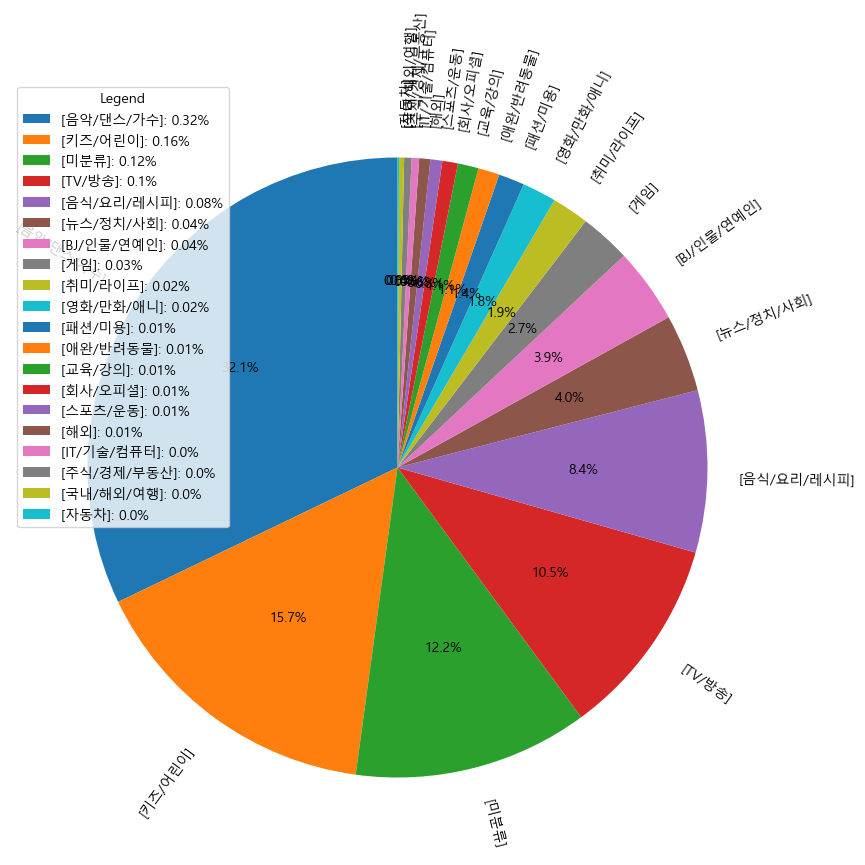

In [149]:
plt.figure(figsize = (10, 30))
labels = pivot_df['Category']
plt.pie(pivot_df['subscriber_sum'],
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        rotatelabels=True
        )
total = sum(pivot_df['subscriber_sum'])
legend_lables = [f'{label}: {round(size/total, 2)}%' for label, size in zip(pivot_df['Category'], pivot_df['subscriber_sum'])]
plt.legend(title='Legend', labels=legend_lables)

plt.show()